<a href="https://colab.research.google.com/github/Amaliastf/PCVK_Ganjil_2023/blob/main/week_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tugas Praktikum**

1. Buat Gamma Correction sesuai dengan petnjuk berikut

In [68]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [69]:
import cv2 as cv
import cv2
import matplotlib.pyplot as plt
import numpy as np
from skimage import io
from PIL import Image
import glob
from math import log10, sqrt
from google.colab.patches import cv2_imshow

In [70]:
original = cv.imread('/content/drive/MyDrive/PCVK/Images/female.tiff')
gamma_image = np.zeros(original.shape, original.dtype)

 Gamma Correction pada citra 
----------------------------------
Masukkan nilai Gamma: 3


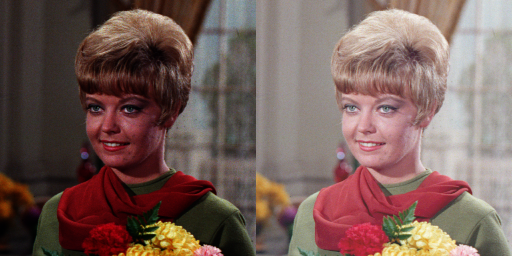

In [5]:
print(' Gamma Correction pada citra ')
print('----------------------------------')

# Input nilai untuk Gamma berupa bilangan bulat
try:
  gamma = int(input('Masukkan nilai Gamma: '))
except ValueError:
  print('Error, not a number')

# Mengontrol basis citra
for x in range(original.shape[0]):

  # Mengontrol kolom citra
  for y in range(original.shape[1]):

    # Mengontrol warna
    for c in range(original.shape[2]):
      gamma_image[x,y,c] = np.clip (255 * pow (original[x,y,c] / 255,(1/gamma)), 0, 255)

final_frame = cv.hconcat((original, gamma_image))
cv2_imshow(final_frame)

2. Buatlah Simulasi Image Depth

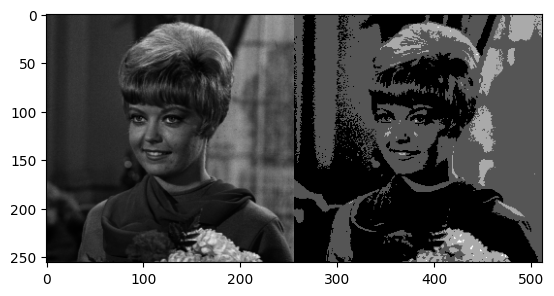

In [44]:
# Konversi citra ke bit
bit_depth = 2
# menghitung nilai level
level = 255 / (pow(2,bit_depth)-1)

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/female.tiff', cv2.IMREAD_GRAYSCALE)
depth_image = np.zeros(original.shape, original.dtype)

# mengkonversi setiap piksel menjadi  kedalaman bit yang ditentukan.
for y in range(original.shape[0]):
    for x in range(original.shape[1]):
        depth_image[y, x] = np.clip(round(original[y, x] / level) * level, 0, 255)


final_frame = cv.hconcat((original, depth_image))
final_frame = cv.cvtColor(final_frame, cv.COLOR_BGR2RGB)
plt.imshow(final_frame)


3. Buat Modul Average Denoising

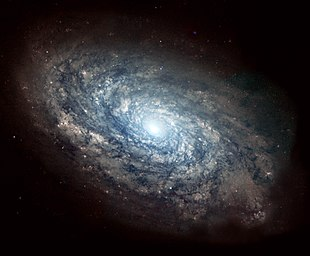

In [32]:
img_galaxy = cv.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
original_galaxy= cv.cvtColor(img_galaxy,cv.COLOR_BGR2RGB) # konversi channel BGR -> RGB
cv2_imshow(original_galaxy)

Nilai PSNR adalah 19.52350989335012 (dB)


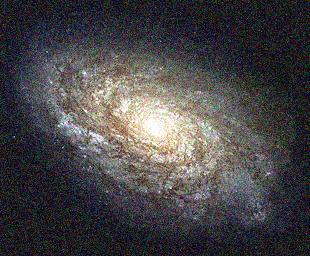

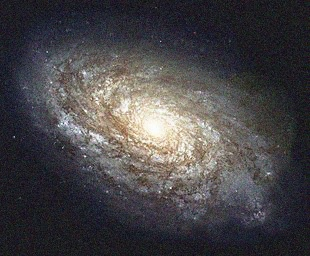

In [47]:
# Jumlah Citra di Average : 5
def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 5
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Jumlah Citra di Average : 5      
Nilai PSNR (dB) : 19.52350989335012

Nilai PSNR adalah 19.731686376131332 (dB)


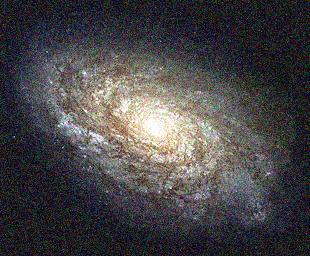

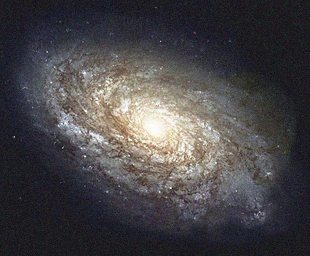

In [49]:
# Jumlah Citra di Average : 10
def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 10
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Jumlah Citra di Average : 10  
Nilai PSNR (dB) : 19.731686376131332 (dB)

Nilai PSNR adalah 19.834746915316128 (dB)


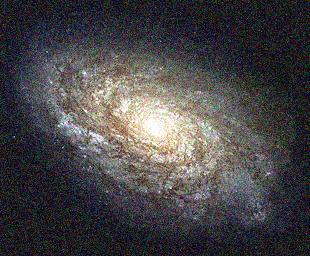

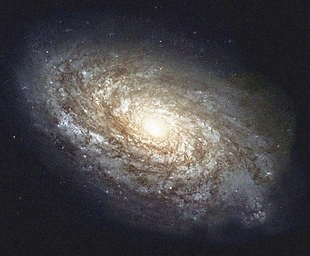

In [50]:
# Jumlah Citra di Average : 20
def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 20
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Jumlah Citra di Average : 20  
Nilai PSNR (dB) : 19.834746915316128 (dB)

Nilai PSNR adalah 19.89178813532771 (dB)


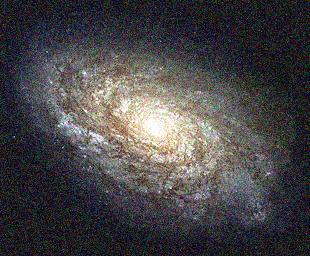

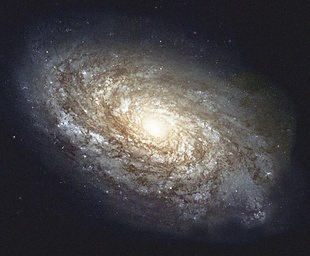

In [52]:
# Jumlah Citra di Average : 40
def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 40
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Jumlah Citra di Average : 40  
Nilai PSNR (dB) : 19.89178813532771 (dB)

Nilai PSNR adalah 19.91675357020905 (dB)


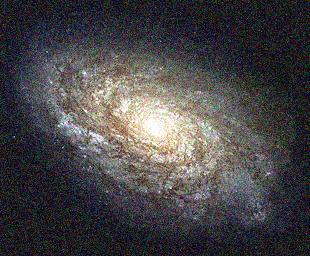

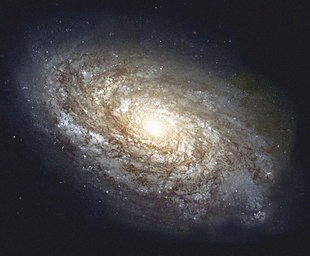

In [53]:
# Jumlah Citra di Average : 80
def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 80
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Jumlah Citra di Average : 80  
Nilai PSNR (dB) : 19.91675357020905 (dB)

Nilai PSNR adalah 19.92196095594035 (dB)


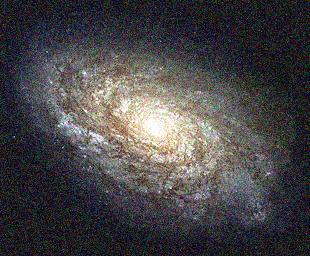

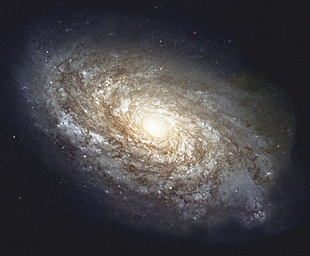

In [54]:
# Jumlah Citra di Average : 100
def PSNR(original, img2):
    mse = np.mean((original - img2) ** 2)
    if mse == 0:
        return 100
    max_pixel = 255.0
    psnr = 20 * log10(max_pixel / sqrt(mse))
    return psnr

original = cv2.imread('/content/drive/MyDrive/PCVK/Images/galaxy.jpg')
cv_img = []
for img in glob.glob('/content/drive/MyDrive/PCVK/noises/*.jpg'):
    n = cv2.imread(img)
    cv_img.append(n)

denoised_image = np.zeros(cv_img[0].shape)
jumlah_gambar = 100
for i in range(jumlah_gambar):
  denoised_image = denoised_image+cv_img[i]
denoised_image = np.uint16(denoised_image/jumlah_gambar)

psnr= PSNR(original, denoised_image)


print('Nilai PSNR adalah', psnr, '(dB)')

cv2_imshow(cv_img[0])
cv2_imshow(denoised_image)

Jumlah Citra di Average : 100  
Nilai PSNR (dB) : 19.92196095594035 (dB)

**Kesimpulan Nomor 3**

Dari hasil PSNR diatas, terlihat bagaimana semakin tinggi nilai PSNR maka akan semakin baik kualitas gambar yang dilakukan denoised dibandingkan gambar asli.

4. Buat image masking

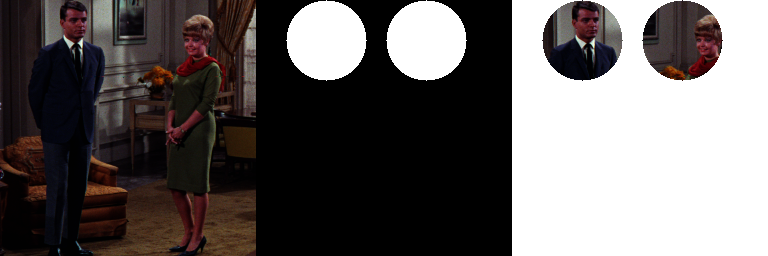

In [55]:
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = img & mask & mask2
result[mask==0] = 255

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

5. Lakukan percobaan menggunakan operator lain dan tunjukkan hasilnya pada modul ini.

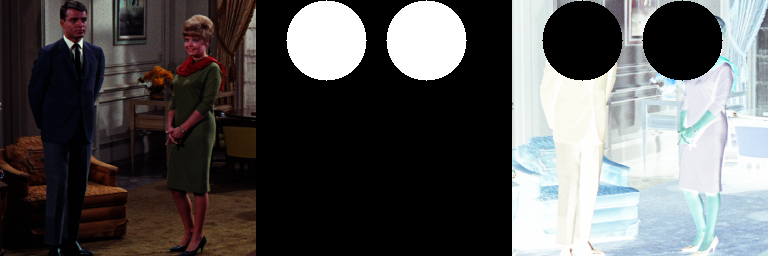

In [62]:
# Operator NOT
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = ~img & ~mask & ~mask2

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Analisa Operator NOT :**

Menggunakan Operator NOT mengubah piksel hitam menjadi putih, dan putih menjadi hitam sehingga terciptalah citra negatif dari citra asli


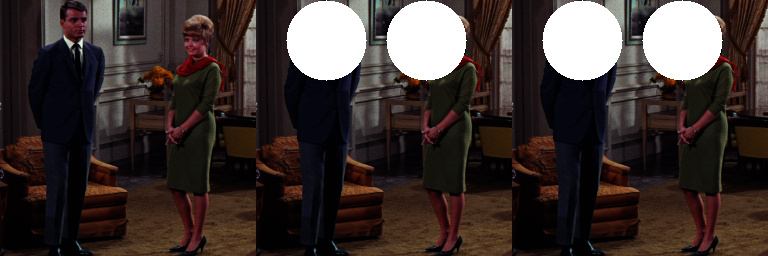

In [72]:
# Operator OR
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = cv.bitwise_or(img,mask, mask2)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Analisa Operator OR :**

Menggunakan Operator OR semua piksel yang dicangkupnya akan berubah menjadi putih. sedangkan pada bagian yang lain akan tetap seperti tampilan awal citra asli tidak berubah.



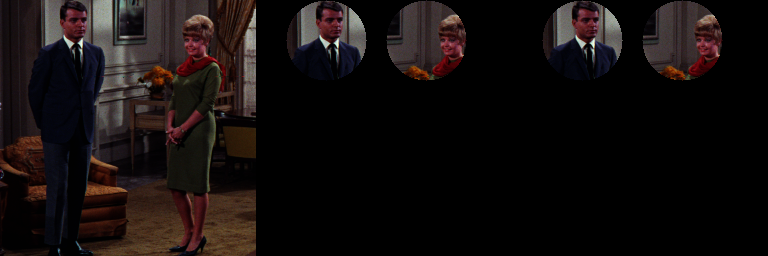

In [74]:
# Operator and
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = cv.bitwise_and(img,mask, mask2)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

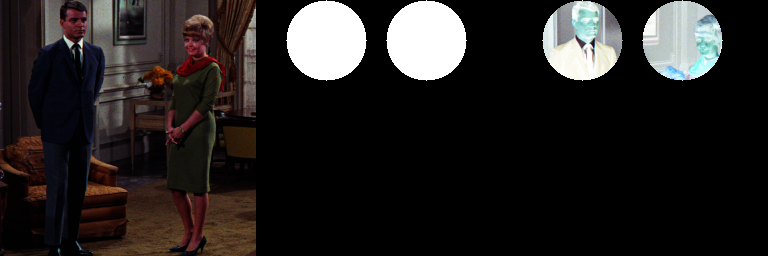

In [77]:
# Operator NAND
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = ~img & mask

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Analisa Operator NAND :**

Pada operasi NAND terjadi penggabungan dengan operasi AND sehingga menampilkan hasil pada bagian pertama berupa citra asli dan selanjutnya menampilkan hasil kebalikan dari AND

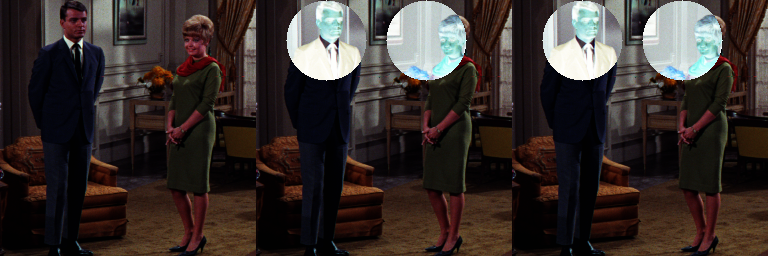

In [76]:
# Operator XOR
img = cv.imread('/content/drive/MyDrive/PCVK/Images/couple.tiff')
mask = np.zeros(img.shape, dtype=np.uint8)
mask = cv.circle(mask, (70, 40), 40, (255,255,255), -1)

mask2 = np.zeros(img.shape, dtype=np.uint8)
mask2 = cv.circle(mask, (170, 40), 40, (255,255,255), -1)

result = cv.bitwise_xor(img,mask, mask2)

final_frame = cv.hconcat((img, mask, result))
cv2_imshow(final_frame)

**Analisa Operator XOR :**

Pada Operasi XOR menghasilkan citra yang menunjukkan perbedaan antara citra asli. Kemudian melakukan penggabungan citra asli, mask pertama dan citra hasil dari operasi XOR.